In [12]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import matplotlib.pyplot as plt
import os.path

In [13]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['reInvent2019_track',
 '2022_august_open',
 'Canada_Training',
 'canada_race',
 'Tokyo_Training_track',
 'Oval_track',
 'New_York_Track',
 'Bowtie_track',
 'H_track',
 'reinvent_base',
 '2022_september_open',
 'Mexico_track',
 'Virtual_May19_Train_track',
 'Straight_track',
 'AWS_track',
 'China_track',
 '2022_july_open',
 '2022_june_open',
 'London_Loop_Train']

In [14]:
# Replace the name here with the track to analyze
TRACK_NAME = '2022_september_open'

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Separate into center, inner, outer waypoints
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

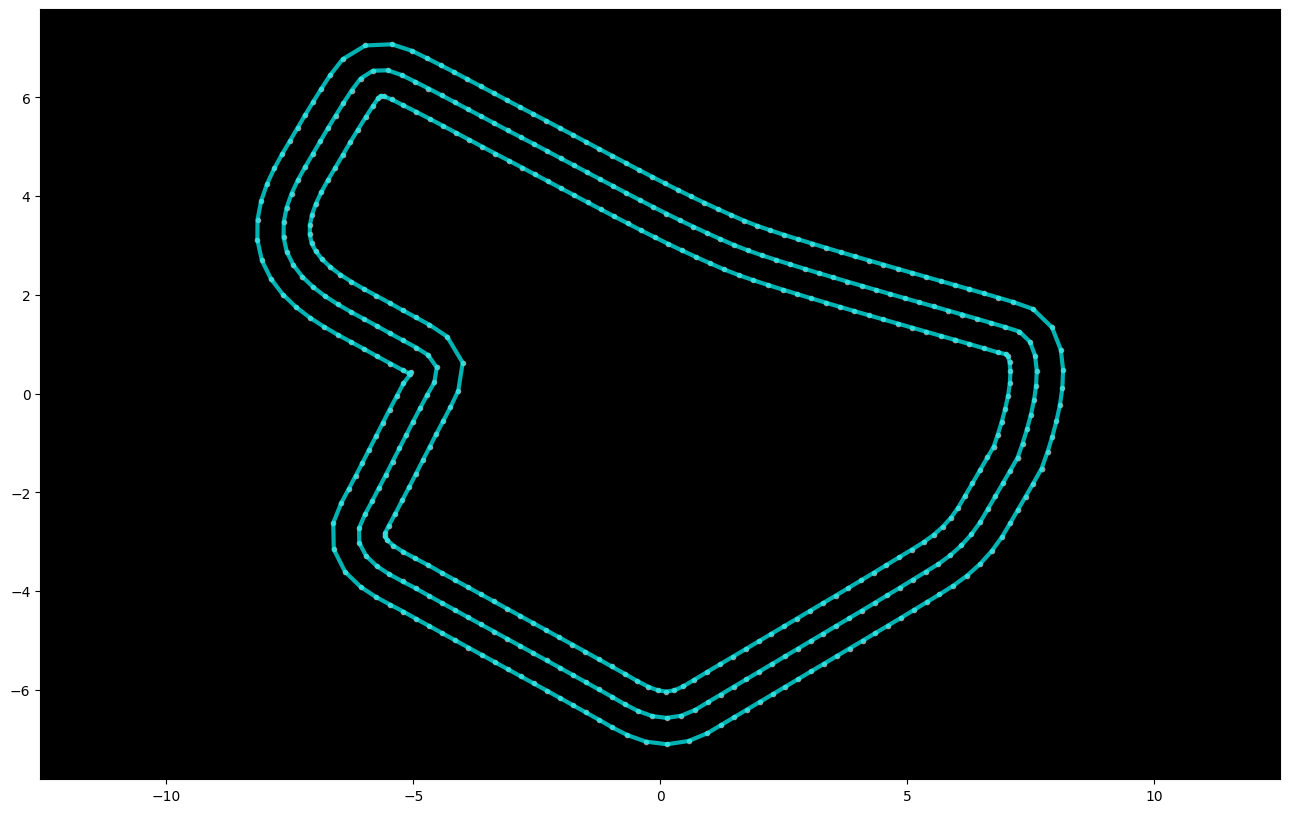

In [15]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

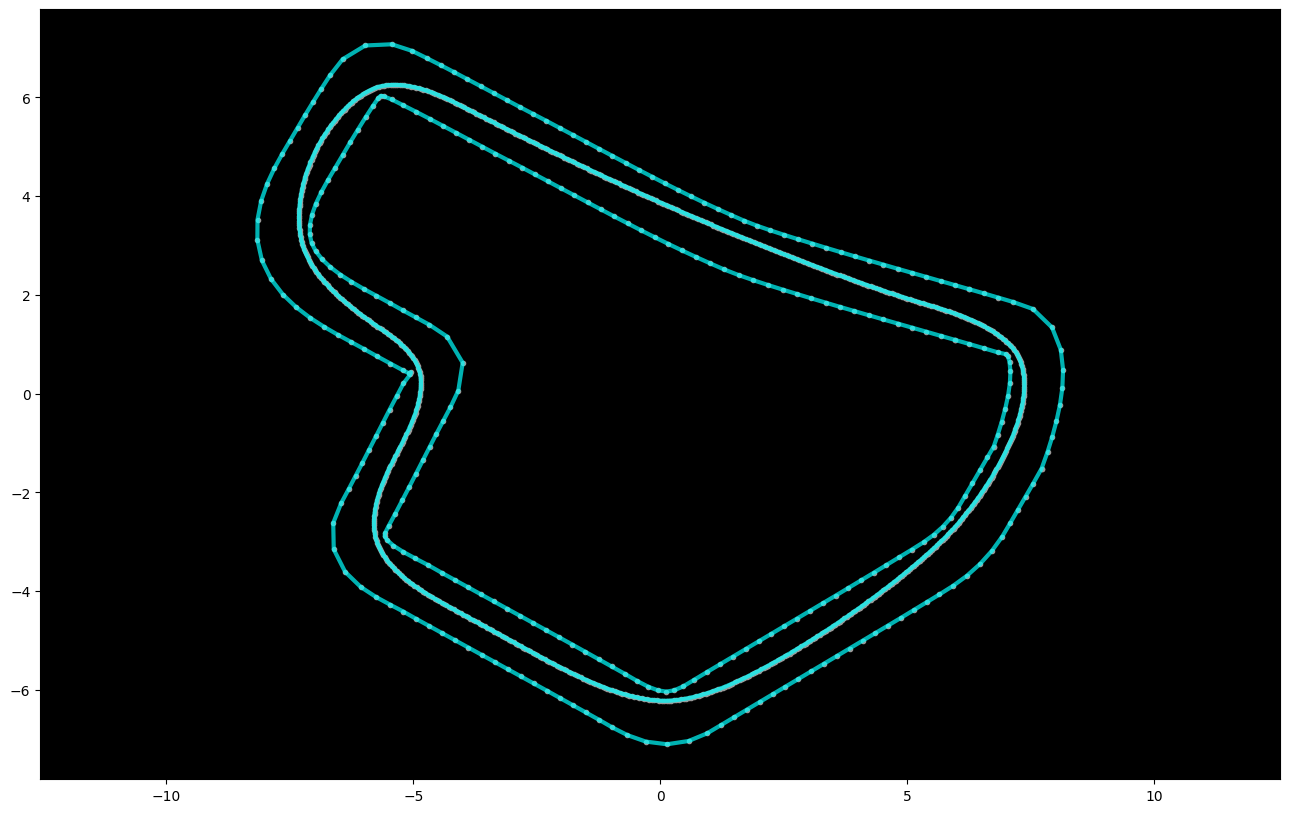

In [16]:
from numpy import array

fname = './racelines-populated/2022_september_open-cubspl-5.47-2022-12-18-145359.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
racing_line = deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line, inner_border, outer_border)

In [17]:
def plot_track(ax):
    ax.plot(inner_border[:, 0], inner_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(outer_border[:, 0], outer_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(inner_border[:, 0], inner_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    ax.plot(outer_border[:, 0], outer_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

In [18]:
npoints = len(racing_line) - 1

In [19]:
# Input 3 coords [[x1,y1],[x2,y2],[x3,y3]]
def circle_radius(coords):

    # Flatten the list and assign to variables
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # In case a is zero (so radius is infinity)
    try:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    except:
        r = 999

    return r

In [20]:
track_curvatures = np.zeros(npoints)
for i in range(npoints):
    prv = (i - 1) % npoints
    nxt = (i + 1) % npoints
    points = [[racing_line[prv, 0], racing_line[prv, 1]], [racing_line[i, 0], racing_line[i, 1]], [racing_line[nxt, 0], racing_line[nxt, 1]]]
    track_curvatures[i] = circle_radius(points)
track_curvatures

/var/folders/lg/g300yg4s1fzcn46rh60dn9nw0000gn/T/ipykernel_58099/671575083.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5


array([4.73117665e+00, 7.46895771e+00, 7.56512700e+00, 7.96509130e+00,
       8.05377198e+00, 8.42022369e+00, 8.56991437e+00, 9.05156156e+00,
       9.39322742e+00, 9.73616682e+00, 9.50128018e+00, 1.15103974e+01,
       1.70399294e+01, 3.54475837e+01, 6.58183645e+01, 2.22638470e+01,
       1.31806157e+01, 1.14872735e+01, 1.36025093e+01, 1.61343855e+01,
       1.93581507e+01, 2.61645024e+01, 3.12415058e+01, 3.45823318e+01,
       2.84433958e+01, 3.11891772e+01, 2.61131503e+01, 2.84118459e+01,
       2.92683878e+01, 3.11467641e+01, 2.83900223e+01, 3.21800027e+01,
       3.21811032e+01, 4.01930157e+01, 3.44150065e+01, 3.71503004e+01,
       3.43958077e+01, 4.01447497e+01, 4.19732630e+01, 3.57083819e+01,
       4.58080796e+01, 3.56940676e+01, 4.57769416e+01, 4.40260084e+01,
       4.35475799e+01, 4.19719293e+01, 4.57400900e+01, 4.82092624e+01,
       4.82140363e+01, 4.00759389e+01, 4.57018873e+01, 4.82032750e+01,
       5.65987139e+01, 4.82082333e+01, 4.56728115e+01, 7.43766623e+01,
      

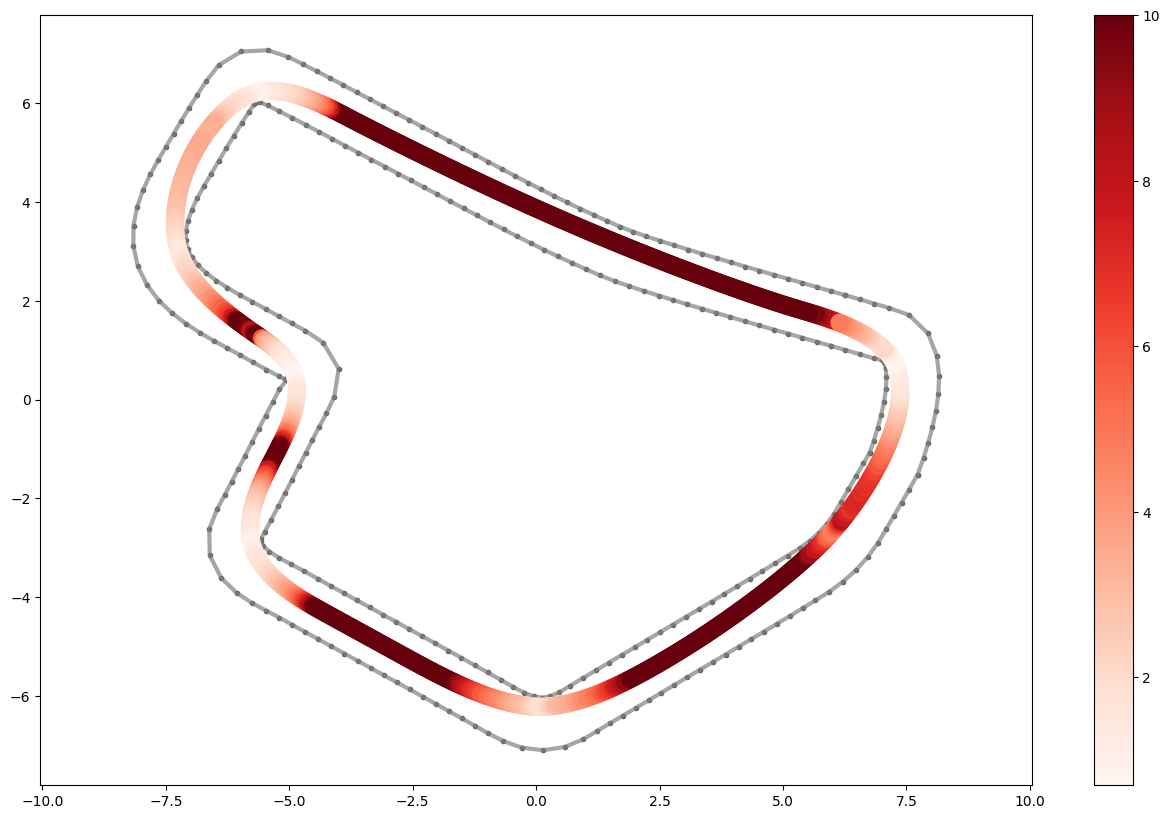

In [23]:
MAX_CURVATURE = 10

fig = plt.figure(2, figsize=(16, 10))
ax = fig.add_subplot(111)
plt.axis('equal')
plot_track(ax)
scatter = ax.scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=np.minimum(track_curvatures, MAX_CURVATURE), cmap='Reds', zorder=3
)
fig.colorbar(scatter)

In [24]:
def is_right_turn(points: list) -> bool:
    prv_x = points[1][0] - points[0][0]
    prv_y = points[1][1] - points[0][1]
    nxt_x = points[2][0] - points[1][0]
    nxt_y = points[2][1] - points[1][1]

    #rotate nxt counterclockwise
    nxt_x, nxt_y = -nxt_y, nxt_x

    dot = prv_x * nxt_x + prv_y * nxt_y
    return dot > 0

In [25]:
track_directions = np.zeros(npoints)
for i in range(npoints):
    prv = (i - 1) % npoints
    nxt = (i + 1) % npoints
    points = [[racing_line[prv, 0], racing_line[prv, 1]], [racing_line[i, 0], racing_line[i, 1]], [racing_line[nxt, 0], racing_line[nxt, 1]]]
    track_directions[i] = -1 if is_right_turn(points) else 1
track_directions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

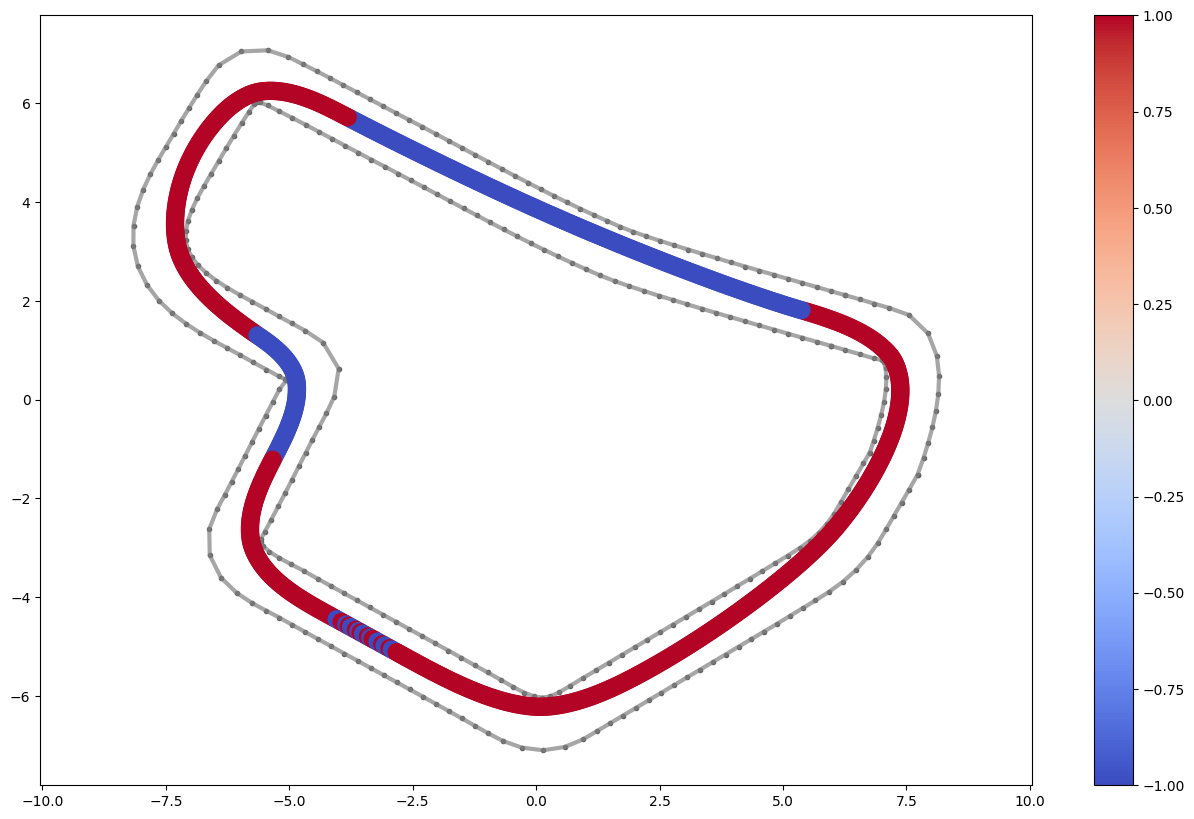

In [26]:
fig = plt.figure(2, figsize=(16, 10))
ax = fig.add_subplot(111)
plt.axis('equal')
plot_track(ax)
scatter = ax.scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=track_directions, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [15]:
track_curvatures = np.minimum(track_curvatures, MAX_CURVATURE)
signed_track_curvatures = track_curvatures * track_directions

In [16]:
from datetime import datetime

now = datetime.now()
prefix = './track-curvatures/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(signed_track_curvatures))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, signed_track_curvatures)

Writing python code to ./track-curvatures/2022_september_open-2022-10-23-150342.py
Writing numpy binary to ./track-curvatures/2022_september_open-2022-10-23-150342.npy
